In [4]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Data/Train_data.csv')
# '.values' need the 2nd Column Opening Price as a Numpy array (not vector)
# '1:2' is used because the upper bound is ignored
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
# Use Normalization (versus Standardization) for RNNs with Sigmoid Activation Functions
# 'MinMaxScalar' is a Normalization Library
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps (look back 60 days) and 1 output
# This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price
# The wrong number of timesteps can lead to Overfitting or bogus results
# 'x_train' Input with 60 previous days' stock prices
X_train = []
# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping (add more dimensions)
# This lets you add more indicators that may potentially have corelation with Stock Prices
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# '.shape[0]' is the number of Rows (Batch Size)
# '.shape[1]' is the number of Columns (timesteps)
# 'input_dim' is the number of factors that may affect stock prices
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Show the dataset we're working with
display(dataset_train)

,Date,Open,Close,High,Low,Volume
0,1/3/2012,326.19,332.70,334.07,326.18,3677850
1,1/4/2012,332.62,334.14,335.12,330.31,2864365
2,1/5/2012,330.87,329.50,331.98,328.11,3283277
3,1/6/2012,329.57,325.01,330.00,324.89,2694024
4,1/9/2012,323.25,311.23,323.50,310.61,5825720
...,...,...,...,...,...,...
2511,12/23/2021,2941.79,2942.85,2971.45,2939.02,690934
2512,12/27/2021,2949.27,2961.28,2968.53,2945.00,662966
2513,12/28/2021,2967.49,2928.96,2967.49,2918.71,931792
2514,12/29/2021,2928.59,2930.09,2943.68,2910.09,851236


In [7]:
# Part 2 - Building the RNN
# Building a robust stacked LSTM with dropout regularization

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
# Regression is when you predict a continuous value
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 84ms/step - loss: 0.0017
Epoch 2/100
38/38 [==============================] - 4s 95ms/step - loss: 2.5463e-04
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 2.1872e-04
Epoch 4/100
38/38 [==============================] - 5s 141ms/step - loss: 1.8359e-04
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 1.9398e-04
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 1.6949e-04
Epoch 7/100
38/38 [==============================] - 3s 85ms/step - loss: 1.5134e-04
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 1.5472e-04
Epoch 9/100
38/38 [==============================] - 4s 105ms/step - loss: 1.4024e-04
Epoch 10/100
38/38 [==============================] - 5s 134ms/step - loss: 1.3313e-04
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 1.3799e-04
Epoch 12/100
38/38 [==============================] - 3s 79m

38/38 [==============================] - 3s 81ms/step - loss: 6.3148e-05
Epoch 97/100
38/38 [==============================] - 3s 83ms/step - loss: 6.1529e-05
Epoch 98/100
38/38 [==============================] - 3s 84ms/step - loss: 5.8615e-05
Epoch 99/100
38/38 [==============================] - 3s 81ms/step - loss: 5.2253e-05
Epoch 100/100
38/38 [==============================] - 3s 85ms/step - loss: 6.2183e-05


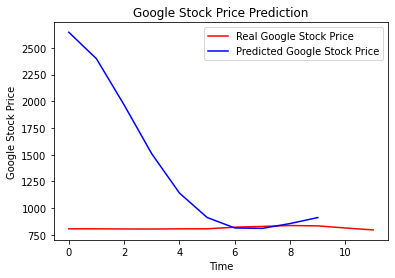

In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Data/Test_Data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
# array of values of "open"

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# didn't understand this values

# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)

# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(60, 70):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()